# A/B TEST — Control 2023 vs Treatment 2024

## Objective
Evaluate the effect of discount reduction on:
- **total_loss_due_to_discount** → expected to decrease
- **total_margin_usd** → expected to increase
- **total_units_sold** → expected to remain stable (drop < 1%)

## Datasets used
- `control_significant.csv` → actual data 2023
- `treatment_significant.csv` → simulated data 2024

## Statistical Approach

Following the recommendation from the project’s call to action, we proceed with a statistical analysis to validate the impact of the discount reduction. We will perform hypothesis testing comparing the control group (2023) and the treatment group (2024) on key metrics: total loss due to discount, total margin in USD, and total units sold.

## 1. Importing Libraries
In this section, I load the necessary libraries for:
- data manipulation (`pandas`)
- creating plots (`matplotlib`, `seaborn`)
- performing statistical tests (`scipy`)

In [64]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## 2. Loading the Datasets
I load the CSV files (control and treatment) containing the data to be analyzed.

In [ ]:
treatment = pd.read_csv("treatment_significant.csv")
control = pd.read_csv("control_significant.csv")

<>:2: SyntaxWarning: invalid escape sequence '\H'
<>:2: SyntaxWarning: invalid escape sequence '\H'
C:\Users\Sker\AppData\Local\Temp\ipykernel_22464\545548206.py:2: SyntaxWarning: invalid escape sequence '\H'
  control = pd.read_csv("C://Users//Sker//OneDrive//Desktop//Python eserc//archive\Homework//control_significant.csv")


## 3. Initial Exploration
I check the structure of the datasets to understand how many rows/columns they have and to take a look at the values.

In [66]:
print("Treatment 2024")
display(treatment.head())
print("Control 2023")
display(control.head())

Treatment 2024


,year,month,continent,country,macro_category,category,brand_name,channel,total_units_sold,total_revenue,...,gross_potential,margin_per_unit_orig,disc_factor,cost_factor,net_margin_usd,net_margin_percent,discount_loss_share,high_cost_loss_share,sales_staff,revenue_per_staff
0,2024,1,Asia,China,Equipment,Gloves,Venum,Retail,12.217797,675.409581,...,685.874735,49.882672,0.85,0.9,658.017759,0.964507,0.040832,0.0,0,0.000000
1,2024,1,Asia,Singapore,Equipment,Gloves,Yokkao,Distributor,22.605196,3423.843465,...,2409.159286,51.265159,0.85,0.9,1644.742429,0.475575,0.221030,0.0,1,3458.427742
2,2024,1,Asia,Thailand,Equipment,Belly Pads,Windy,Retail,21.557150,3360.916128,...,1003.777628,35.516419,1.30,1.2,792.459056,0.233429,0.062247,0.0,1,3394.864776
3,2024,1,Asia,UAE,Equipment,Gloves,Windy,Online,29.603819,1674.042316,...,1338.995315,34.869813,1.00,1.0,788.521732,0.466318,0.325541,0.0,0,0.000000
4,2024,1,Europe,France,Equipment,Kick Pads,Booster Fight Gear,Retail,19.674411,1621.024102,...,1189.206676,36.390794,1.30,1.2,679.947101,0.415261,0.311018,0.0,0,0.000000


Control 2023


,year,month,continent,country,macro_category,category,brand_name,channel,total_units_sold,total_revenue,...,gross_potential,margin_per_unit_orig,disc_factor,cost_factor,net_margin_usd,net_margin_percent,discount_loss_share,high_cost_loss_share,sales_staff,revenue_per_staff
0,2023,1,Asia,China,Equipment,Gloves,Venum,Retail,12.341209,682.231900,...,685.874735,49.882672,0.85,0.9,658.017759,0.964507,0.040832,0.0,0,0.000000
1,2023,1,Asia,Singapore,Equipment,Gloves,Yokkao,Distributor,22.833532,3458.427742,...,2409.159286,51.265159,0.85,0.9,1644.742429,0.475575,0.221030,0.0,1,3458.427742
2,2023,1,Asia,Thailand,Equipment,Belly Pads,Windy,Retail,21.774899,3394.864776,...,1003.777628,35.516419,1.30,1.2,792.459056,0.233429,0.062247,0.0,1,3394.864776
3,2023,1,Asia,UAE,Equipment,Gloves,Windy,Online,29.902848,1690.951834,...,1338.995315,34.869813,1.00,1.0,788.521732,0.466318,0.325541,0.0,0,0.000000
4,2023,1,Europe,France,Equipment,Kick Pads,Booster Fight Gear,Retail,19.873143,1637.398083,...,1189.206676,36.390794,1.30,1.2,679.947101,0.415261,0.311018,0.0,0,0.000000


## 4. Data Filtering
I select only the relevant records for the A/B test:
- Countries: Japan, Germany, Thailand  
- Period: from January to June  
- Control group: year 2023  
- Treatment group: year 2024  

This way, I obtain two comparable datasets (control vs treatment).

In [67]:
countries = ["Japan", "Germany", "Thailand"]
months = list(range(1, 7))

control_filt = control[
    (control["year"] == 2023) &
    (control["month"].isin(months)) &
    (control["country"].isin(countries))
]

treatment_filt = treatment[
    (treatment["year"] == 2024) &
    (treatment["month"].isin(months)) &
    (treatment["country"].isin(countries))
]

print("Controllo filtered:", control_filt.shape)
print("Treatment filtered:", treatment_filt.shape)



Controllo filtered: (23, 29)
Treatment filtered: (23, 29)


#
I create a dictionary to associate each variable with a readable name , to be used in charts and test results.

In [68]:
labels = {
    "total_loss_due_to_discount": "Loss Due Discount",
    "total_margin_usd": "Total Margin (USD))",
    "total_units_sold": "Units sold"
}

## 6. Normality Pre-test (Shapiro-Wilk)
I define a function that allows me to check the data distribution.  
For each key variable, I check:
- the histogram with density curve,
- the result of the Shapiro-Wilk test.

If the p-value < 0.05 → the data are NOT normal, so I will use a non-parametric test (Mann-Whitney).

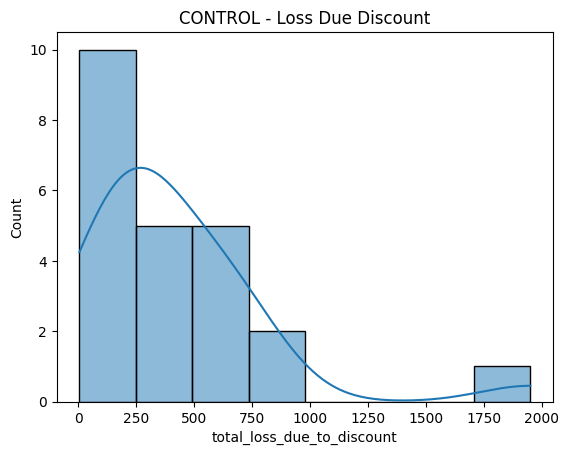

Shapiro CONTROL-Loss Due Discount: stat=0.739, p=0.000


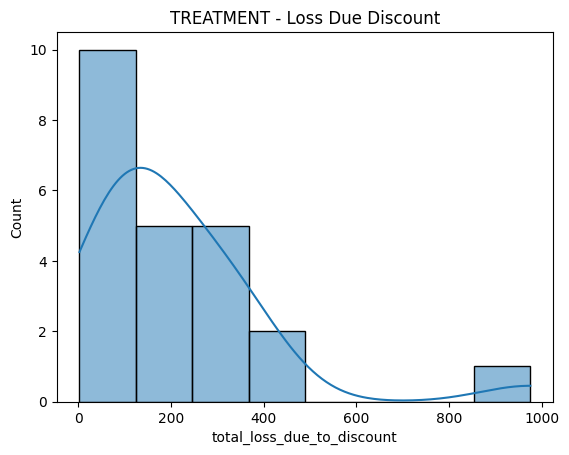

Shapiro TREATMENT-Loss Due Discount: stat=0.739, p=0.000


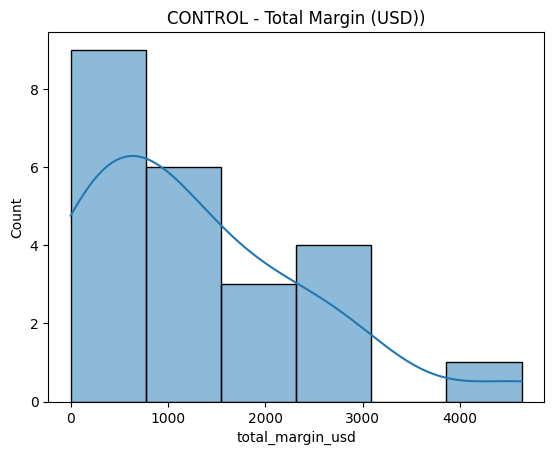

Shapiro CONTROL-Total Margin (USD)): stat=0.887, p=0.014


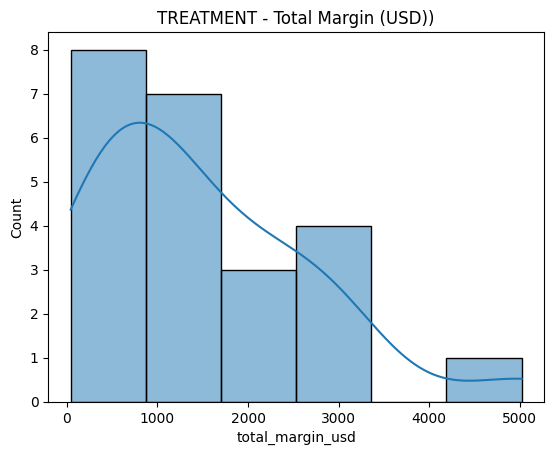

Shapiro TREATMENT-Total Margin (USD)): stat=0.895, p=0.020


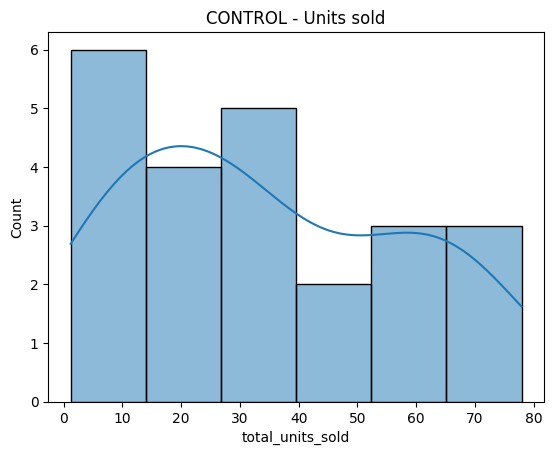

Shapiro CONTROL-Units sold: stat=0.929, p=0.102


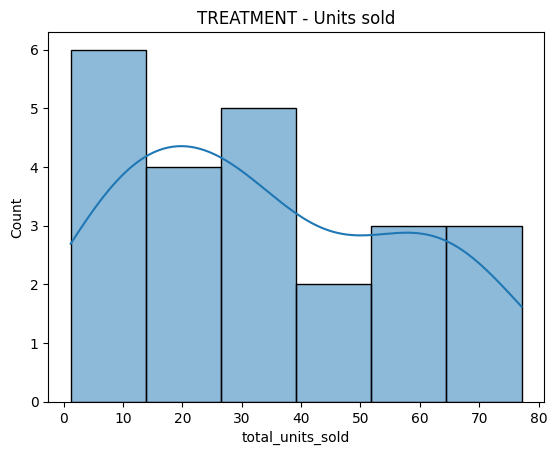

Shapiro TREATMENT-Units sold: stat=0.929, p=0.102


In [69]:
def check_distribution(data, col, group):
    sns.histplot(data[col], kde=True)
    nome_it = labels.get(col, col)
    plt.title(f"{group} - {nome_it}")
    plt.show()
    stat, p = stats.shapiro(data[col].dropna())
    print(f"Shapiro {group}-{nome_it}: stat={stat:.3f}, p={p:.3f}")

for col in ["total_loss_due_to_discount", "total_margin_usd", "total_units_sold"]:
    check_distribution(control_filt, col, "CONTROL")
    check_distribution(treatment_filt, col, "TREATMENT")

## 7. Test on total_loss_due_to_discount (Mann-Whitney U)
I check if the loss due to discount differs between treatment and control.
I use the non-parametric Mann-Whitney U test (two-tailed), consistent with non-normality.
I interpret p-value < 0.05 as a statistically significant difference.

In [70]:
def compare_mw(control, treatment, col):
    # numeric conversion and NaN handling
    x = pd.to_numeric(control[col], errors="coerce").dropna()
    y = pd.to_numeric(treatment[col], errors="coerce").dropna()

    stat, p = stats.mannwhitneyu(y, x, alternative="two-sided")
    print(f"\n>>> {col} — Mann-Whitney U (two-sided)")
    print(f"Mean CONTROL = {x.mean():.2f} | Mean TREATMENT = {y.mean():.2f}")
    print(f"stat = {stat:.3f}, p-value = {p:.3f}")
    delta_pct = (y.mean() - x.mean()) / abs(x.mean()) * 100
    print(f"Δ% (T vs C) = {delta_pct:.2f}%")
    print(" → SIGNIFICANT difference" if p < 0.05 else " → NON-significant difference")

compare_mw(control_filt, treatment_filt, "total_loss_due_to_discount")


>>> total_loss_due_to_discount — Mann-Whitney U (two-sided)
Mean CONTROL = 417.83 | Mean TREATMENT = 208.91
stat = 152.000, p-value = 0.014
Δ% (T vs C) = -50.00%
 → SIGNIFICANT difference


## 8. Test on total_margin_usd (Mann-Whitney U)
I evaluate whether the total margin differs in the treatment compared to the control.
I use the Mann-Whitney U test (two-tailed). p-value < 0.05 indicates a significant difference.

In [71]:
def compare_mw(control, treatment, col):
    # numeric conversion and NaN handling
    x = pd.to_numeric(control[col], errors="coerce").dropna()
    y = pd.to_numeric(treatment[col], errors="coerce").dropna()

    stat, p = stats.mannwhitneyu(y, x, alternative="two-sided")
    print(f"\n>>> {col} — Mann-Whitney U (two-sided)")
    print(f"Mean CONTROL = {x.mean():.2f} | Mean TREATMENT = {y.mean():.2f}")
    print(f"stat = {stat:.3f}, p-value = {p:.3f}")
    delta_pct = (y.mean() - x.mean()) / abs(x.mean()) * 100
    print(f"Δ% (T vs C) = {delta_pct:.2f}%")
    print(" → SIGNIFICANT difference" if p < 0.05 else " → NON-significant difference")

compare_mw(control_filt, treatment_filt, "total_margin_usd")


>>> total_margin_usd — Mann-Whitney U (two-sided)
Mean CONTROL = 1261.61 | Mean TREATMENT = 1470.52
stat = 300.000, p-value = 0.442
Δ% (T vs C) = 16.56%
 → NON-significant difference


## 9. Test on total_units_sold (one-tailed Welch t-test)
I check that volumes do not worsen: alternative hypothesis “greater” (mean(treatment) > mean(control)).
I use Welch’s t-test (variances not necessarily equal). p-value < 0.05 → volumes are at least stable or higher.

In [72]:
def compare_ttest_greater(control, treatment, col):
    # numeric conversion and NaN handling
    x = pd.to_numeric(control[col], errors="coerce").dropna()
    y = pd.to_numeric(treatment[col], errors="coerce").dropna()

    # try with recent SciPy (supports alternative=); simple fallback if not supported
    try:
        stat, p = stats.ttest_ind(y, x, equal_var=False, alternative="greater")
    except TypeError:
        stat, p2 = stats.ttest_ind(y, x, equal_var=False)
        # H1: mean(y) > mean(x)  → one-sided from two-tailed
        p = p2 / 2 if stat > 0 else 1 - (p2 / 2)

    print(f"\n>>> {col} — Welch t-test (greater)")
    print(f"Mean CONTROL = {x.mean():.2f} | Mean TREATMENT = {y.mean():.2f}")
    print(f"stat = {stat:.3f}, p-value = {p:.3f}")
    delta_pct = (y.mean() - x.mean()) / abs(x.mean()) * 100
    print(f"Δ% (T vs C) = {delta_pct:.2f}%")
    print(" → SIGNIFICANT difference" if p < 0.05 else " → NON-significant difference")

compare_ttest_greater(control_filt, treatment_filt, "total_units_sold")


>>> total_units_sold — Welch t-test (greater)
Mean CONTROL = 34.39 | Mean TREATMENT = 34.04
stat = -0.050, p-value = 0.520
Δ% (T vs C) = -1.00%
 → NON-significant difference


## 10. Analysis by Individual Country
After evaluating the overall results, I perform tests separately for each country (Japan, Germany, Thailand).  
- Loss due to discount (**Mann-Whitney U**, two-tailed)  
- Total margin (**Mann-Whitney U**, two-tailed)  
- Units sold (**t-test**, one-tailed, to check that volumes remain stable)  

This way, I can understand if the treatment effect is consistent across markets or if specific differences emerge for individual countries.

In [73]:
print("\n=== Test by Country ===")
for ctry in ["Japan","Germany","Thailand"]:
    ctl = control_filt[control_filt["country"]==ctry]
    trt = treatment_filt[treatment_filt["country"]==ctry]
    if len(ctl)==0 or len(trt)==0:
        print(f"{ctry}: insufficient data")
        continue
    # Loss (MW)
    statL, pL = stats.mannwhitneyu(trt["total_loss_due_to_discount"].dropna(),
                                   ctl["total_loss_due_to_discount"].dropna(),
                                   alternative="two-sided")
    # Margin (MW)
    statM, pM = stats.mannwhitneyu(trt["total_margin_usd"].dropna(),
                                   ctl["total_margin_usd"].dropna(),
                                   alternative="two-sided")
    # Units (t one-sided)
    statU, pU = stats.ttest_ind(trt["total_units_sold"].dropna(),
                                ctl["total_units_sold"].dropna(),
                                equal_var=False, alternative="greater")
    print(f"\n{ctry}:")
    print(f"  Loss  p={pL:.3f}  | mean C={ctl['total_loss_due_to_discount'].mean():.2f}  T={trt['total_loss_due_to_discount'].mean():.2f}")
    print(f"  Margin p={pM:.3f} | mean C={ctl['total_margin_usd'].mean():.2f}  T={trt['total_margin_usd'].mean():.2f}")
    print(f"  Units  p={pU:.3f} | mean C={ctl['total_units_sold'].mean():.2f}  T={trt['total_units_sold'].mean():.2f}")


=== Test by Country ===

Japan:
  Loss  p=0.180  | mean C=451.22  T=225.61
  Margin p=0.589 | mean C=1906.10  T=2131.71
  Units  p=0.512 | mean C=45.02  T=44.57

Germany:
  Loss  p=0.077  | mean C=513.30  T=256.65
  Margin p=0.377 | mean C=1266.08  T=1522.73
  Units  p=0.513 | mean C=39.36  T=38.97

Thailand:
  Loss  p=0.130  | mean C=285.38  T=142.69
  Margin p=0.505 | mean C=773.21  T=915.89
  Units  p=0.513 | mean C=20.81  T=20.60


# Conclusions

The A/B analysis between control (2023) and treatment (2024) highlights the following points:

- **Loss due to discount**: the goal was a significant reduction. The Mann-Whitney test confirms that the loss decreased by **50%** (p=0.014).  
- **Total margin**: the goal was an increase. The treatment mean is higher (+16.6%), but the difference is **not statistically significant** (p=0.442).  
- **Units sold**: the goal was stability (drop < 1%). The difference is not significant (p=0.520), so volumes can be considered **substantially unchanged**.  

### Summary
The A/B test shows that the discount reduction led to a **significant cut in loss** without compromising sales volumes.  
However, there is **no strong evidence** that the total margin increased significantly.  

Overall, the experiment can be considered **partially successful**:  
- loss reduction goal achieved,  
- stable volumes,  
- margin not statistically confirmed.  

For expansion to other markets, it is recommended to:  
- better monitor the margin over a longer period,  
- analyze country-by-country differences to understand where the effect is most promising